Data Preprocessing

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from scipy import stats 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#cek dataset 
house1 = pd.read_csv("/content/drive/MyDrive/SenproTIF/HARGA RUMAH JAKSEL.csv")
house1.head(10)

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,JAKSEL
1,"19,000,000,000",824,800,4,4,ADA,JAKSEL
2,"4,700,000,000",500,400,4,3,ADA,JAKSEL
3,"4,900,000,000",251,300,5,4,ADA,JAKSEL
4,"28,000,000,000",1340,575,4,5,ADA,JAKSEL
5,"10,000,000,000",460,300,4,4,ADA,JAKSEL
6,"7,600,000,000",278,350,4,4,ADA,JAKSEL
7,"5,250,000,000",511,300,3,2,ADA,JAKSEL
8,"670,000,000",70,69,3,2,TIDAK ADA,JAKSEL
9,"480,000,000",66,42,2,1,TIDAK ADA,JAKSEL


In [5]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.9+ KB


In [6]:
house1.describe()

,LT,LB,JKT,JKM
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,530.504496,487.275724,4.457542,3.940060
std,531.069773,452.872262,2.004606,1.903261
min,22.000000,38.000000,1.000000,1.000000
25%,220.000000,300.000000,4.000000,3.000000
50%,400.000000,411.000000,4.000000,4.000000
75%,677.000000,600.000000,5.000000,4.000000
max,6790.000000,10000.000000,27.000000,27.000000


In [7]:
#cek dataset 2 
house2 = pd.read_csv("/content/drive/MyDrive/SenproTIF/DATA RUMAH.csv")
house2.head(10)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,6,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,7,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,8,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,9,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,10,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


In [8]:
house2.shape

(1010, 8)

Pada dataset house2 terlihat bahwa terdapat kolom nama rumah, dataset tersebut menunjukkan bahwa rumah yang dijual berada di area Tebet dan Jakarta Selatan. Untuk itu kami fokus pada area Jakarta Selatan sehingga kami gunakan lokasi Jakarta Selatan pada dataset 2. Sementara itu, Tebet pun ada di Jakarta Selatan sehingga tetap masuk ke Jakarta Selatan. 

In [9]:
#drop column nama rumah di house2 
house2 = house2.drop(['NO', 'NAMA RUMAH'], axis=1)
house2.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [10]:
#membuat kolom Garasi menjadi Ada dan Tidak Ada 
house2['GRS'] = house2['GRS'].apply(lambda x: "ADA" if x >= 1 else "TIDAK ADA")
house2.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,TIDAK ADA
1,4600000000,180,137,4,3,ADA
2,3000000000,267,250,4,4,ADA
3,430000000,40,25,2,2,TIDAK ADA
4,9000000000,400,355,6,5,ADA


In [11]:
#merename nama kolom pada house2 agar sama dengan house1 yaitu KT menjadi JKT, dan KM menjadi JKM 
house2 = house2.rename(columns={'KT': 'JKT', 'KM': 'JKM'})
house2.head()

,HARGA,LB,LT,JKT,JKM,GRS
0,3800000000,220,220,3,3,TIDAK ADA
1,4600000000,180,137,4,3,ADA
2,3000000000,267,250,4,4,ADA
3,430000000,40,25,2,2,TIDAK ADA
4,9000000000,400,355,6,5,ADA


In [12]:
#melakukan reorder LB dan LT menjadi LT dan LB pada house2 
house2 = house2[['HARGA','LT', 'LB', 'JKT', 'JKM', 'GRS']]
house2.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,3800000000,220,220,3,3,TIDAK ADA
1,4600000000,137,180,4,3,ADA
2,3000000000,250,267,4,4,ADA
3,430000000,25,40,2,2,TIDAK ADA
4,9000000000,355,400,6,5,ADA


In [13]:
#menghapus koma pada harga rumah di house1 
house1['HARGA'] = house1['HARGA'].str.replace(',','')
house1.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


In [14]:
#menambahkan kolom kota pada house2 
# karena fokus pada 1 lokasi tidak perlu ada kota tempat rumah dijual (drop kolom KOTA)
house1 = house1.drop(['KOTA'], axis=1)
house1.head()

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,ADA
1,19000000000,824,800,4,4,ADA
2,4700000000,500,400,4,3,ADA
3,4900000000,251,300,5,4,ADA
4,28000000000,1340,575,4,5,ADA


Karena dataset telah disamakan kolom dan value nya antara dua dataset, dua dataset digabungkan untuk menghasilkan satu dataset berisi data rumah di Area Jaksel

In [15]:
house_jaksel = pd.concat([house1, house2])
house_jaksel.head(30)

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,ADA
1,19000000000,824,800,4,4,ADA
2,4700000000,500,400,4,3,ADA
3,4900000000,251,300,5,4,ADA
4,28000000000,1340,575,4,5,ADA
5,10000000000,460,300,4,4,ADA
6,7600000000,278,350,4,4,ADA
7,5250000000,511,300,3,2,ADA
8,670000000,70,69,3,2,TIDAK ADA
9,480000000,66,42,2,1,TIDAK ADA


In [16]:
house_jaksel.shape

(2011, 6)

In [17]:
house_jaksel.to_csv("hargarumahjaksel.csv")

Data Cleaning

In [18]:
#cek null value 
house_jaksel.isnull().sum()

HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
dtype: int64

Tidak ada null value dalam dataset sehingga tidak perlu dihapus 

In [19]:
#cek duplicate 
print(house_jaksel.duplicated().value_counts())

False    1874
True      137
dtype: int64


In [20]:
duplicate = house_jaksel.duplicated()
print(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
1005    False
1006    False
1007     True
1008    False
1009    False
Length: 2011, dtype: bool


Terlihat bahwa terdapat 137 data duplikat pada dataset sehingga perlu dilakukan drop data duplikat untuk menghindari bias pada analisis. Drop data dilakukan karena intensi awal pengembangan sebuah model untuk memprediksi harga rumah dengan parameter LT, LB, JKT, JKM, dan GRS. kedua dataset mungkin memiliki data rumah yang sama sehingga perlu di drop. 

In [21]:
house_jaksel_new = house_jaksel.drop_duplicates()
house_jaksel_new.shape

(1874, 6)

In [22]:
print(house_jaksel_new.duplicated().value_counts())

False    1874
dtype: int64


In [23]:
house_jaksel_new.to_csv("newhargarumahjaksel.csv")

In [24]:
#pindah data ke drive agar bisa diakses kapanpun 
#from google.colab import drive
#drive.mount('/content/drive')

In [25]:
#!cp /content/"HARGA RUMAH JAKSEL.csv" /content/drive/MyDrive/SenproTIF/
#!cp /content/"DATA RUMAH.csv" /content/drive/MyDrive/SenproTIF/
#!cp /content/hargarumahjaksel.csv /content/drive/MyDrive/SenproTIF/
#!cp /content/newhargarumahjaksel.csv /content/drive/MyDrive/SenproTIF/

Exploratory Data Analysis

In [26]:
house_jaksel_new.describe()

,LT,LB,JKT,JKM
count,1874.000000,1874.000000,1874.000000,1874.000000
mean,385.330843,381.536820,4.564034,3.752935
std,430.944162,367.322132,1.837327,1.713707
min,22.000000,38.000000,1.000000,1.000000
25%,140.000000,192.000000,4.000000,3.000000
50%,247.000000,300.000000,4.000000,4.000000
75%,472.000000,500.000000,5.000000,4.000000
max,6790.000000,10000.000000,27.000000,27.000000


Terlihat bahwa harga belum masuk saat analisis univariates, padahal seharusnya harga masuk karena data numerik sehingga perlu diubah menjadi numerik terlebih dahulu. 

In [27]:
house_jaksel_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1874 non-null   object
 1   LT      1874 non-null   int64 
 2   LB      1874 non-null   int64 
 3   JKT     1874 non-null   int64 
 4   JKM     1874 non-null   int64 
 5   GRS     1874 non-null   object
dtypes: int64(4), object(2)
memory usage: 102.5+ KB


In [28]:
house_jaksel_new['HARGA'] = house_jaksel_new['HARGA'].astype('int64')
house_jaksel_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1874 non-null   int64 
 1   LT      1874 non-null   int64 
 2   LB      1874 non-null   int64 
 3   JKT     1874 non-null   int64 
 4   JKM     1874 non-null   int64 
 5   GRS     1874 non-null   object
dtypes: int64(5), object(1)
memory usage: 102.5+ KB


<ipython-input-28-f301df0dd2e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_jaksel_new['HARGA'] = house_jaksel_new['HARGA'].astype('int64')


In [29]:
#house_jaksel_new.to_csv("hargarumahnew.csv")
#!cp /content/hargarumahnew.csv /content/drive/MyDrive/SenproTIF/


In [30]:
house_jaksel_new.describe()

,HARGA,LT,LB,JKT,JKM
count,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.253065e+10,385.330843,381.536820,4.564034,3.752935
std,1.659687e+10,430.944162,367.322132,1.837327,1.713707
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000
25%,4.000000e+09,140.000000,192.000000,4.000000,3.000000
50%,7.500000e+09,247.000000,300.000000,4.000000,4.000000
75%,1.550000e+10,472.000000,500.000000,5.000000,4.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000


Dari analisis univariate dapat dilihat bahwa selisih antara mean dan median tidak terlalu jauh pada masing-masing datanya sehingga outliers tidak terlaku banyak

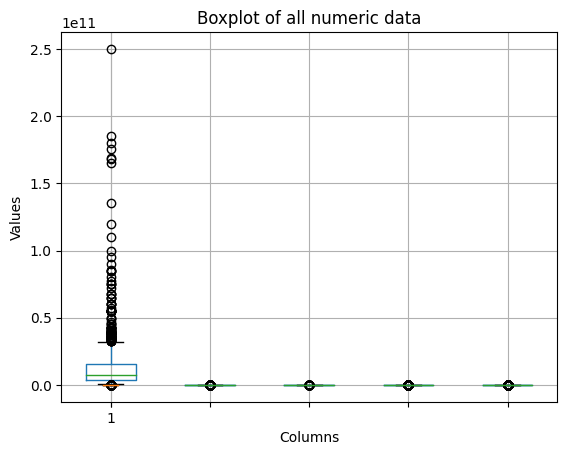

In [31]:
#cek outliers menggunakan boxplot 
house_jaksel_new.boxplot()
plt.boxplot(house_jaksel_new['HARGA'] / 10000000000)

# set title and axis labels
plt.title('Boxplot of all numeric data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


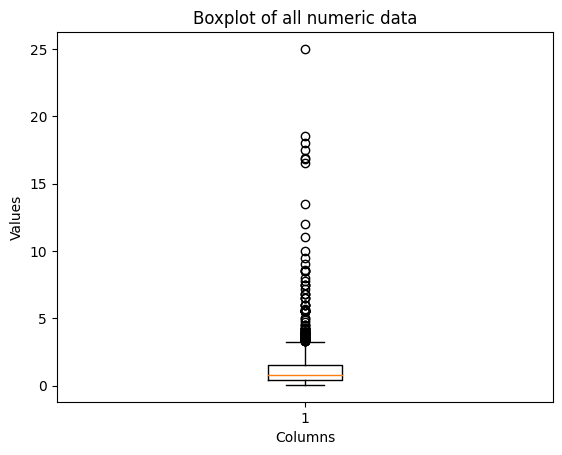

In [32]:
#cek outliers menggunakan boxplot 
plt.boxplot(house_jaksel_new['HARGA'] / 10000000000)

# set title and axis labels
plt.title('Boxplot of all numeric data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

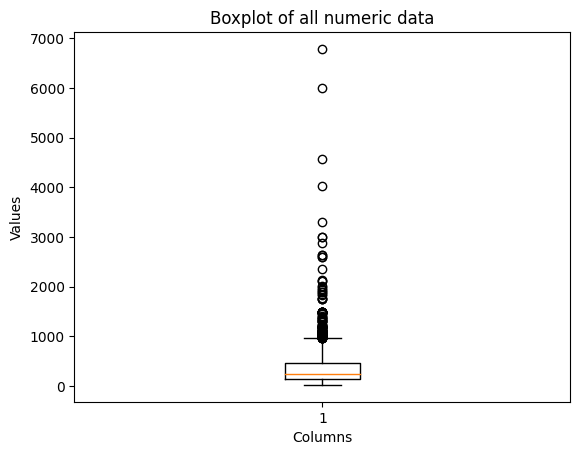

In [33]:
#cek outliers menggunakan boxplot 
plt.boxplot(house_jaksel_new['LT'])

# set title and axis labels
plt.title('Boxplot of all numeric data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

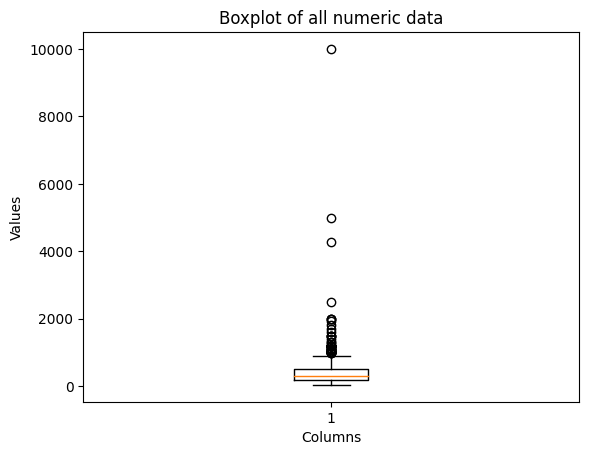

In [34]:
#cek outliers menggunakan boxplot 
plt.boxplot(house_jaksel_new['LB'])

# set title and axis labels
plt.title('Boxplot of all numeric data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

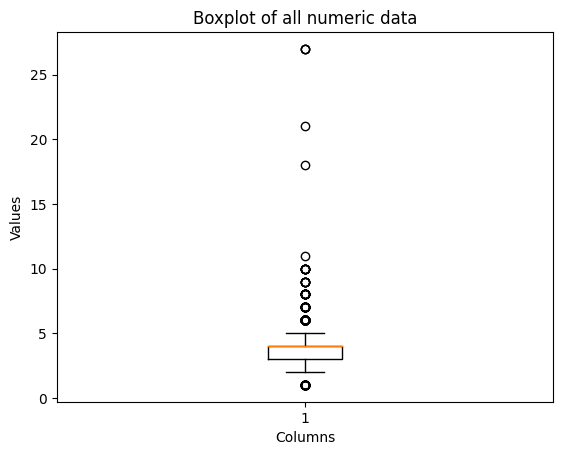

In [35]:
#cek outliers menggunakan boxplot 
plt.boxplot(house_jaksel_new['JKM'])

# set title and axis labels
plt.title('Boxplot of all numeric data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

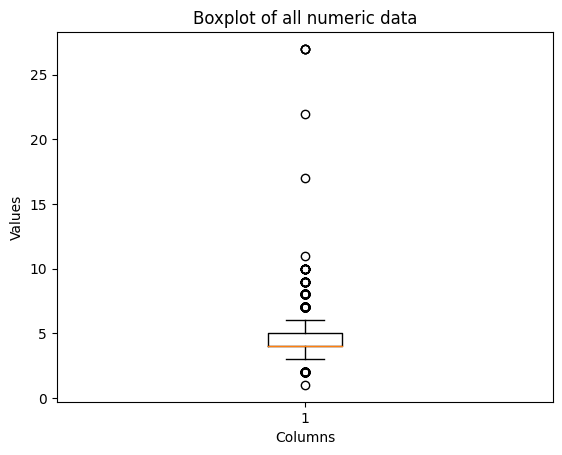

In [36]:
#cek outliers menggunakan boxplot 
plt.boxplot(house_jaksel_new['JKT'])

# set title and axis labels
plt.title('Boxplot of all numeric data')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

Setelah semuanya diplot, terlihat bahwa terdapat beberapa outliers pada data. Akan tetapi, pada analisis ini outliers tidak didrop karena data yang kecil dan outliers cenderung konstan tiap data yang memungkinkan adanya harga rumah tinggi karena beberapa parameter lain juga tinggi. 

Sepertinya pada kolom Garasi (GRS) data akan lebih representatif diubah menjadi 1 jika mempunyai garasi dan 0 jika tidak mempunyai. Hal ini digunakan untuk melihat korelasi antar parameter terhadap harga rumah. 

In [37]:
#house_jaksel_new.replace({'ADA': 1, 'TIDAK ADA': 0}, inplace=True)
#house_jaksel_new.head()

In [38]:
house_jaksel_new['GRS'].replace({'ADA': 1, 'TIDAK ADA': 0}, inplace=True)
house_jaksel_new.head(30)

<ipython-input-38-0b24ca114e8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_jaksel_new['GRS'].replace({'ADA': 1, 'TIDAK ADA': 0}, inplace=True)


,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,1
2,4700000000,500,400,4,3,1
3,4900000000,251,300,5,4,1
4,28000000000,1340,575,4,5,1
5,10000000000,460,300,4,4,1
6,7600000000,278,350,4,4,1
7,5250000000,511,300,3,2,1
8,670000000,70,69,3,2,0
9,480000000,66,42,2,1,0


In [39]:
house_jaksel_new.describe()

,HARGA,LT,LB,JKT,JKM,GRS
count,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.253065e+10,385.330843,381.536820,4.564034,3.752935,0.815902
std,1.659687e+10,430.944162,367.322132,1.837327,1.713707,0.387668
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,0.000000
25%,4.000000e+09,140.000000,192.000000,4.000000,3.000000,1.000000
50%,7.500000e+09,247.000000,300.000000,4.000000,4.000000,1.000000
75%,1.550000e+10,472.000000,500.000000,5.000000,4.000000,1.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000,1.000000


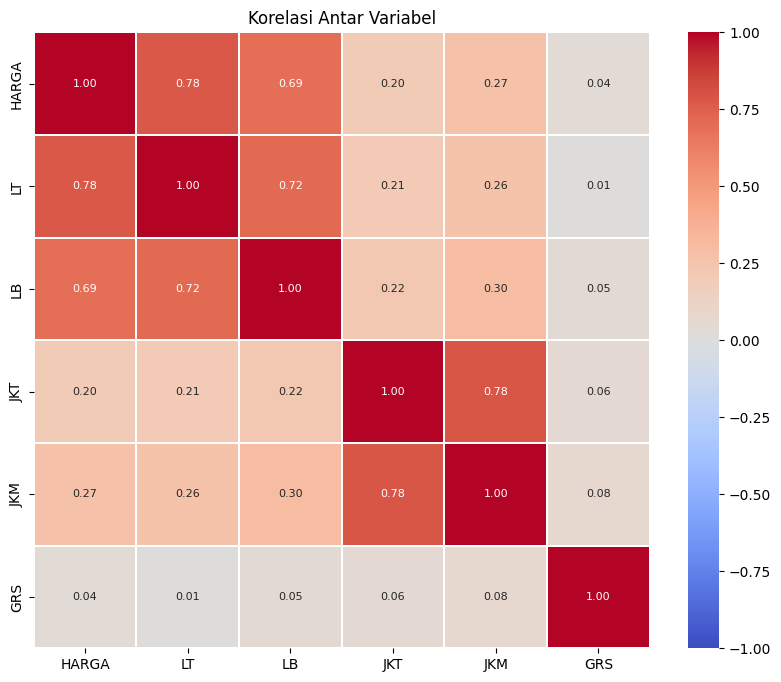

In [40]:
#analisis multivariate 
corr = house_jaksel_new.corr()
plt.figure(figsize= (10,8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws= {"size":8}, fmt='.2f', linewidths=0.1,square =True)
plt.title("Korelasi Antar Variabel")
plt.show()

Dari analisis multivariate terlihat bahwa luas tanah memiliki korelasi yang besar terhadap harga rumah dan garasi memiliki korelasi paling kecil. Meskipun demikian, variabel garasi akan tetap digunakan pada dataset karena berguna untuk analisis kedepannya.

Data Analytic

In [41]:
X = house_jaksel_new.iloc[:, 1:].values   # independent variable
y = house_jaksel_new.iloc[:, 0].values    # dependent variable

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1385, random_state = 0)

In [43]:
# Model regresi linear
line = LinearRegression()
line.fit(X_train, y_train)
# Memasukkan nilai prediksi dari data-test
y_pred = line.predict(X_test)
line.score(X_test, y_test)

0.6573076219979832

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.1385, random_state=0) # ShuffleSplit will randomize the sample
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.65730762, 0.60033812, 0.57820381, 0.62517867, 0.65231068])

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Function that decides between the three most popular algorithms which are iterated through to find out which one gives the 
# best score
def find_best_model_using_gridsearch(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearch(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.582668,{'copy_X': True}
1,lasso,0.582668,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.081984,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [46]:
# Memasukkan nilai konstanta pada model
X = sm.add_constant(X)
# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, X).fit()
print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Model Score: ', line.score(np.array(X_test), y_test))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     669.3
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:17:01   Log-Likelihood:                -45797.
No. Observations:                1874   AIC:                         9.161e+04
Df Residuals:                    1868   BIC:                         9.164e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.52e+09   7.72e+08     -3.264      0.0

In [47]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
# Prediksi pada data-test
LR_Test_predict = line.predict(X_test) 
 
# Menghitung nilai MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  32.95589170092184


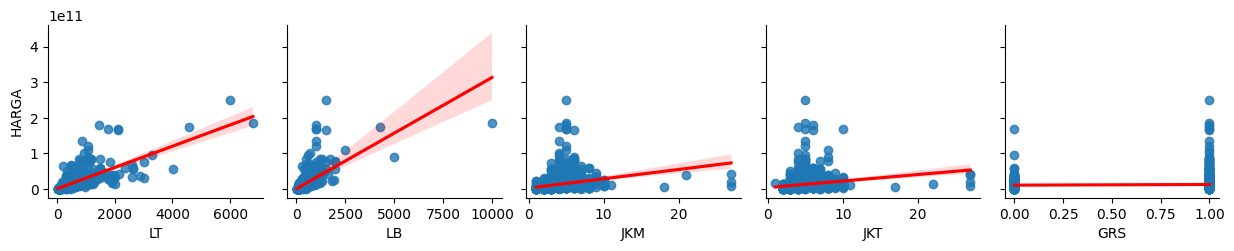

In [48]:
sns.pairplot(house_jaksel_new, x_vars=['LT', 'LB', 'JKM', 'JKT', 'GRS'], y_vars=['HARGA'], kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [50]:
import pickle
pickle.dump(line, open("model_lr.pkl", 'wb'))

In [ ]:
# define fungsi untuk prediksi harga
def predict_price(LT, LB, JKM, JKT, GRS): 
    input_data = [[LT, LB, JKM, JKT, GRS]]
    price_pred = line.predict(input_data)[0]
    return predict_price

In [ ]:
predicted_price = predict_price(300, 200, 2, 3, 1)
print(predicted_price)

<function predict_price at 0x7f73de6d9d80>


In [ ]:
np.set_printoptions(precision=2)
print("Prediksi Harga Rumah: ", line.predict([[1000,880,1,2,1]]))

Prediksi Harga Rumah:  [3.24e+10]


In [ ]:
np.set_printoptions(precision=2)
print("Prediksi Harga Rumah: ", line.predict([[110,200,3,3,1]]))

Prediksi Harga Rumah:  [4.36e+09]


In [ ]:
np.set_printoptions(precision=2)
print("Prediksi Harga Rumah: ", line.predict([[1340,575,4,5,1]]))

Prediksi Harga Rumah:  [3.73e+10]
